# BOXPLOT ADIPO OIL-RED-O

## CONTROL VERSUS TNF VERSUS IRRADIATED FOR 2 DONORS

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### TEMPLATE

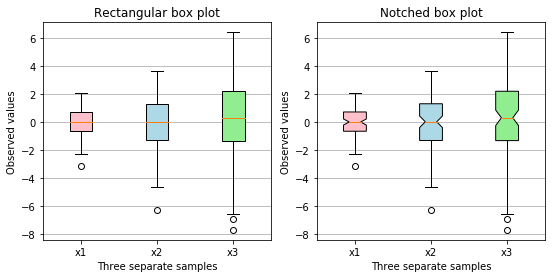

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D70BBB6D30>,
      dtype=object)

In [2]:
# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()
axes

## Boxplot for donor 1

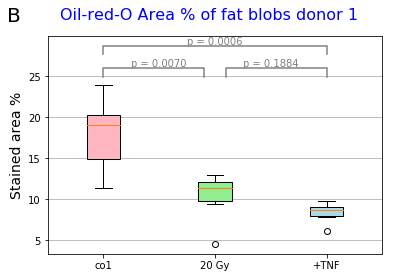

In [85]:
def read_excel_column(data_raw):
    #.replace(',','.').split('\n') THIS WORKS
    data_raw=data_raw.replace(',','.')
    data = [float(d) for d in data_raw.split('\n')]
#     datas = [data[i:i+3] for i in range(0,len(data),3)]
#     return [datas[0]+datas[2], datas[1]+datas[3]]
    return data

labels = ['co1', '20 Gy', '+TNF']
colors = ['lightpink', 'lightgreen', 'lightblue']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig, ax = plt.subplots(nrows=1, ncols=1)

#rects1 = ax.bar(x, men_means, width, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Co1 
all_data1=read_excel_column('''13.706
11.383
20.611
19.473
23.964
18.651''')

# +TNF
all_data3=read_excel_column('''8.934
6.162
9.118
8.511
9.799
7.770''')

# 20 Gy
all_data2=read_excel_column('''12.964
9.455
11.938
10.759
12.155
4.542''')

all_data=[all_data1, all_data2, all_data3]
bplot = ax.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Stained area %', size=14)
# ax.set_xlabel('Conditons', size=14)
ax.yaxis.grid(True)

# vals = ax.get_yticks()
# ax.set_yticklabels(['{}%'.format(x) for x in vals])
# plt.legend()

#* statistical tests
x1, x2, x3 = 1, 2, 3 #apparently the x positions of each box
t, p = stats.ttest_ind(all_data1,all_data2)
y, h, col = max(max(all_data1),max(all_data2), max(all_data3))+1, 1, 'gray'
ax.plot([x1, x1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p = {0:.4f}".format(p), ha='center', va='bottom', color=col)

t, p = stats.ttest_ind(all_data2,all_data3)
ax.plot([x2+0.1, x2+0.1, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x2+x3)*.5, y+h, "p = {0:.4f}".format(p), ha='center', va='bottom', color=col)

t, p = stats.ttest_ind(all_data1,all_data3)
y = y + 2.7
ax.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x3)*.5, y+h, "p = {0:.4f}".format(p), ha='center', va='bottom', color=col)

ax.text(0.2, y+3.5, 'B', ha='center', va='bottom', size=20, color='black') # add figure Letter for thesis paper

# colors = ['lightpink', 'lightgreen', 'lightblue']
# for bplot in (bplot):
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    

fig.suptitle('Oil-red-O Area % of fat blobs donor 1',size=16, color='blue')
fig.savefig('Adipo quantification staining donor 1 2.0.jpeg')        
plt.show()

### Stats donor 1

In [87]:
data_stat= [stats.describe(each) for each in all_data]
means = [data_stat[i].mean for i in range(3)]
means

[17.964666666666666, 10.302166666666666, 8.382333333333333]

### Template

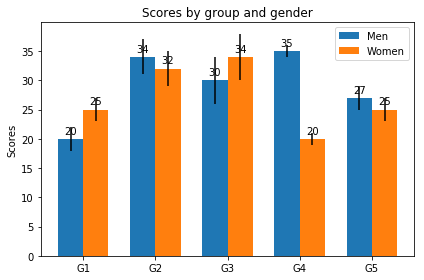

In [4]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, yerr=menStd, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, yerr=menStd, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Unused

In [5]:
#handig stukje om punten in kommas in excel te veranderen
print('''0.919
0.895
1.095
1.168
1.278
0.838
1.319

1.445
1.582
1.692
2.667
3.045'''.replace('\n', ', '))

0.919, 0.895, 1.095, 1.168, 1.278, 0.838, 1.319, , 1.445, 1.582, 1.692, 2.667, 3.045


# BOXPLOT FOR DONORS 2 AND 3

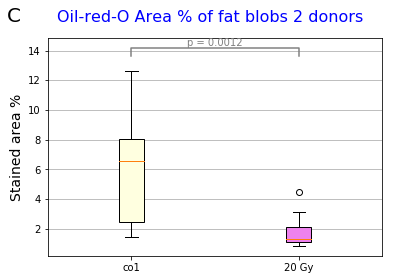

In [71]:
def read_excel_column(data_raw):
    data_raw=np.array([float(d) for d in data_raw.split('\n')])
    return data_raw

labels = ['co1', '20 Gy']
colors = ['lightyellow', 'violet']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig2, ax = plt.subplots(nrows=1, ncols=1)

#rects1 = ax.bar(x, men_means, width, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Co1 donor 2,3  4x
all_data2=read_excel_column('''8.610
7.988
6.038
12.653
7.242
8.175
7.139
1.445
1.582
1.692
2.667
3.045''')

# 20gy donor 2,3 4x
all_data3=read_excel_column('''0.919
0.895
1.095
1.168
1.278
0.838
1.319
3.105
4.501
2.117
1.828
3.031
2.030''')

all_data=[all_data2, all_data3]
bplot = ax.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Stained area %', size=14)
# ax.set_xlabel('Conditons')
# ax.set_title('Area percentage of fat blobs in Induced Adipocites Oil-red-O')

# for bplot in (bplot):
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
#* statistical tests
x1, x2 = 1, 2 #apparently the x positions of each box
t, p = stats.ttest_ind(all_data2,all_data3)
y, h, col = max(max(all_data[0]),max(all_data[1]))+1, 0.5, 'gray'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p = {0:.4f}".format(p), ha='center', va='bottom', color=col)
ax.text(0.3, y+2, 'C', ha='center', va='bottom', size=20, color='black') # figure letter
ax.yaxis.grid(True)

fig2.suptitle('Oil-red-O Area % of fat blobs 2 donors', size=16, color='blue')
fig2.savefig('Adipo quantification staining 2 donors 2.0 .jpeg')        
plt.show()

## Statistics of donors 2,3 to annotate in figure  legend in thesis

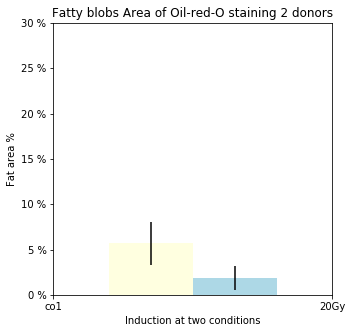

In [72]:
# Get Statistics
# data1_stat=
data2_stat = stats.describe(all_data2)
data3_stat = stats.describe(all_data3)
means=[data2_stat.mean,data3_stat.mean]
# means = [float("{:.2f}".format(x)) for x in means]
stDevs=np.sqrt([data2_stat.mean,data3_stat.mean])

labels = ['co1', '20Gy']
colors = ['lightyellow', 'lightblue']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

figg, ax =plt.subplots(figsize=(5, 5))
meanss = [float("{:.2f}".format(x)) for x in means]
rects4 = plt.bar([0.35,0.65],
                meanss,
                width,
                 align='center',
                label=labels,
                yerr=stDevs,
                color=colors)
# plt.show()

# fig, ax = plt.subplots(figsize=(5, 5))


# rects2 = ax.bar(x-width/2, 
#                 round(means[0],0),
#                 width, 
#                 label=labels[0], 
#                 yerr=stDevs[0], 
#                 color=colors[0])
# rects3 = ax.bar(x+width/2,
#                 round(means[1],2),
#                 width, 
#                 label=labels[1] ,
#                 yerr=stDevs[1],
#                 color=colors[1])

# rects3 = ax.bar(x + width, tnf_means, width, label='+TNF')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fat area %')
ax.set_ylim(top=30) 
ax.set_xlabel('Induction at two conditions')
ax.set_title('Fatty blobs Area of Oil-red-O staining 2 donors')
plt.xticks(x, labels)
vals = ax.get_yticks()
ax.set_yticklabels(["{} %".format(int(x)) for x in vals])
# plt.legend()
fig.savefig('adipo 2 donors.png')
plt.show()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')       
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects2)

# Statistics
# t=[]
# for i in range(len(labels)):
#     t1,p1 = stats.ttest_rel(data_raw['co1'][i], data_raw['Gy20'][i])
#     t2,p2 = stats.ttest_rel(data_raw['co1'][i], data_raw['Gy20'][i])    
#     t.append([p1,p2])


# fig.tight_layout()
# fig.savefig('Von Kossa Osteo Area.png')




In [75]:
print(stDevs)
print(meanss)

[2.38530222 1.36223798]
[5.69, 1.86]
